In [3]:
import numpy as np
import pandas as pd

#### << 4명 학생의 5과목 성적 처리 >>

In [29]:
data = {'성명':['이순신','김유신','홍길동','고길동'],
        '국어':[100,88,88,99],
        '영어':[88,67,98,100],
        '수학':[89,99,100,78],
        '과학':[100,99,90,80],
        '사회':[67,78,89,99]}
df = pd.DataFrame(data)
df

,성명,국어,영어,수학,과학,사회
0,이순신,100,88,89,100,67
1,김유신,88,67,99,99,78
2,홍길동,88,98,100,90,89
3,고길동,99,100,78,80,99


### 인덱스 지정 : set_index()
- 기존 열을 사용하여 DataFrame 인덱스를 설정
- 하나 이상의 기존 열 또는 배열(올바른 길이)을 사용하여 DataFrame 인덱스(행 레이블)를 설정. 
- 인덱스는 기존 인덱스를 대체하거나 확장할 수 있다.

#### 1) '성명'을 index로 지정하기

In [30]:
df = df.set_index('성명')
df

,국어,영어,수학,과학,사회
성명,,,,,
이순신,100,88,89,100,67
김유신,88,67,99,99,78
홍길동,88,98,100,90,89
고길동,99,100,78,80,99


#### 2) 5과목 성적의 합을 구한 후 '합' 열 추가

In [31]:
df["합"] = df.sum(axis = 1)
df

,국어,영어,수학,과학,사회,합
성명,,,,,,
이순신,100,88,89,100,67,444
김유신,88,67,99,99,78,431
홍길동,88,98,100,90,89,465
고길동,99,100,78,80,99,456


#### 3) 5과목 성적의 평균을 구한 후 '평균' 열 추가

In [32]:
df["평균"] = df.loc[:, '국어':'사회'].mean(axis = 1)
df

,국어,영어,수학,과학,사회,합,평균
성명,,,,,,,
이순신,100,88,89,100,67,444,88.8
김유신,88,67,99,99,78,431,86.2
홍길동,88,98,100,90,89,465,93.0
고길동,99,100,78,80,99,456,91.2


#### 4) '합'으로 내림차순 정렬

In [33]:
df.sort_values("합", ascending = False)

,국어,영어,수학,과학,사회,합,평균
성명,,,,,,,
홍길동,88,98,100,90,89,465,93.0
고길동,99,100,78,80,99,456,91.2
이순신,100,88,89,100,67,444,88.8
김유신,88,67,99,99,78,431,86.2


#### 5) 과목 평균을 구한 후 '과목평균' 행 추가

In [34]:
df.loc["과목평균"] = df.loc[:, '국어':'사회'].mean(axis = 0)
df

,국어,영어,수학,과학,사회,합,평균
성명,,,,,,,
이순신,100.00,88.00,89.0,100.00,67.00,444.0,88.8
김유신,88.00,67.00,99.0,99.00,78.00,431.0,86.2
홍길동,88.00,98.00,100.0,90.00,89.00,465.0,93.0
고길동,99.00,100.00,78.0,80.00,99.00,456.0,91.2
과목평균,93.75,88.25,91.5,92.25,83.25,NaN,NaN


In [35]:
df1 = df.reset_index()
df1

,성명,국어,영어,수학,과학,사회,합,평균
0,이순신,100.00,88.00,89.0,100.00,67.00,444.0,88.8
1,김유신,88.00,67.00,99.0,99.00,78.00,431.0,86.2
2,홍길동,88.00,98.00,100.0,90.00,89.00,465.0,93.0
3,고길동,99.00,100.00,78.0,80.00,99.00,456.0,91.2
4,과목평균,93.75,88.25,91.5,92.25,83.25,NaN,NaN


In [36]:
df2 = df1.set_index('성명')
df2

,국어,영어,수학,과학,사회,합,평균
성명,,,,,,,
이순신,100.00,88.00,89.0,100.00,67.00,444.0,88.8
김유신,88.00,67.00,99.0,99.00,78.00,431.0,86.2
홍길동,88.00,98.00,100.0,90.00,89.00,465.0,93.0
고길동,99.00,100.00,78.0,80.00,99.00,456.0,91.2
과목평균,93.75,88.25,91.5,92.25,83.25,NaN,NaN


In [37]:
df2.drop(['과목평균'], axis = 0)

,국어,영어,수학,과학,사회,합,평균
성명,,,,,,,
이순신,100.0,88.0,89.0,100.0,67.0,444.0,88.8
김유신,88.0,67.0,99.0,99.0,78.0,431.0,86.2
홍길동,88.0,98.0,100.0,90.0,89.0,465.0,93.0
고길동,99.0,100.0,78.0,80.0,99.0,456.0,91.2


In [39]:
df2.drop(['평균'], axis = 1)

,국어,영어,수학,과학,사회,합
성명,,,,,,
이순신,100.00,88.00,89.0,100.00,67.00,444.0
김유신,88.00,67.00,99.0,99.00,78.00,431.0
홍길동,88.00,98.00,100.0,90.00,89.00,465.0
고길동,99.00,100.00,78.0,80.00,99.00,456.0
과목평균,93.75,88.25,91.5,92.25,83.25,NaN


#### << 다음은 10명 학생에 관한 정보를 담고 있는 변수들이다. >>
 - sname : 학생 이름
 - noclass : 반 번호
 - gender : 성별
 - height : 키
 - weight : 몸무게

In [40]:
np.random.seed(0)

sname = ['s' + format(i, '03d') for i in range(10)]
noclass = np.random.randint(1, 6, 10)
gender = ['female'] * 5 + ['male'] * 5
height = np.random.randint(160, 190, 10)
weight = np.random.randint(50, 80, 10)

### 문제1
sname, noclass, gender, height, weight를 column으로 사용하는 DataFrame 변수 ``student``를 생성하시오. 

(index는 자동으로 생성되는 정수), , (딕셔너리로 데이터프레임 생성)

In [47]:
data = {'sname' : sname,
        'noclass' : noclass,
        'gender' : gender,
        'height' : height,
        'weight' : weight}

student = pd.DataFrame(data)
student

,sname,noclass,gender,height,weight
0,s000,5,female,184,55
1,s001,1,female,172,75
2,s002,4,female,186,63
3,s003,4,female,161,58
4,s004,4,female,166,59
5,s005,2,male,167,70
6,s006,4,male,183,69
7,s007,3,male,174,66
8,s008,5,male,184,69
9,s009,1,male,177,55


### 문제2
``info`` DataFrame에서 height column을 기준으로 오름차순 정렬하시오.

In [48]:
student.sort_values(['height'])

,sname,noclass,gender,height,weight
3,s003,4,female,161,58
4,s004,4,female,166,59
5,s005,2,male,167,70
1,s001,1,female,172,75
7,s007,3,male,174,66
9,s009,1,male,177,55
6,s006,4,male,183,69
0,s000,5,female,184,55
8,s008,5,male,184,69
2,s002,4,female,186,63


### 문제3
1반부터 5반까지 담임교사의 성이 각각 Kim, Lee, Park, Choi, Yun이라고 할 때 <br>
반번호(1반~5반)와 담임교사의 이름(tname)을 column으로 가지는 DataFrame 변수 ``teacher``를 생성하시오. <br> 
(index는 자동으로 생성되는 정수값이다)

In [46]:
data = {'noclass' : [1, 2, 3, 4, 5],
        'tname' : ['Kim', 'Lee', 'Park', 'Choi', 'Yun']}

teacher = pd.DataFrame(data)
teacher

,noclass,tname
0,1,Kim
1,2,Lee
2,3,Park
3,4,Choi
4,5,Yun


#### + 추가코드
``student``와 ``teacher``를 합쳐서 ``info`` 라는 이름의 DataFrame변수를 생성한다. 
 - noclass column이 key값이 된다.

In [63]:
student.sort_values('noclass')

,sname,noclass,gender,height,weight
1,s001,1,female,172,75
9,s009,1,male,177,55
5,s005,2,male,167,70
7,s007,3,male,174,66
2,s002,4,female,186,63
3,s003,4,female,161,58
4,s004,4,female,166,59
6,s006,4,male,183,69
0,s000,5,female,184,55
8,s008,5,male,184,69


In [65]:
info = student.merge(teacher)
info.sort_values('noclass')

,sname,noclass,gender,height,weight,tname
1,s001,1,female,172,75,Kim
9,s009,1,male,177,55,Kim
5,s005,2,male,167,70,Lee
7,s007,3,male,174,66,Park
2,s002,4,female,186,63,Choi
3,s003,4,female,161,58,Choi
4,s004,4,female,166,59,Choi
6,s006,4,male,183,69,Choi
0,s000,5,female,184,55,Yun
8,s008,5,male,184,69,Yun


### 문제4
``student`` 라는 이름의 DataFrame변수에서 weight가 60이상 이고 height가 170이상인 row만 표시하시오.

In [62]:
student[(student.height > 170) & (student.weight > 60)]

,sname,noclass,gender,height,weight
1,s001,1,female,172,75
2,s002,4,female,186,63
6,s006,4,male,183,69
7,s007,3,male,174,66
8,s008,5,male,184,69


### 문제5
$ratio=height-weight$ 일 때 
새로운 column인 ``ratio``를 ``student`` 에 추가하시오. 

In [71]:
student['ratio'] = student.height - student.weight
student

,sname,noclass,gender,height,weight,ratio
0,s000,5,female,184,55,129
1,s001,1,female,172,75,97
2,s002,4,female,186,63,123
3,s003,4,female,161,58,103
4,s004,4,female,166,59,107
5,s005,2,male,167,70,97
6,s006,4,male,183,69,114
7,s007,3,male,174,66,108
8,s008,5,male,184,69,115
9,s009,1,male,177,55,122


In [76]:
student['BMI'] = (student.weight) / ((student.height / 100) ** 2).round(2)
student

,sname,noclass,gender,height,weight,ratio,BMI
0,s000,5,female,184,55,129,16.224189
1,s001,1,female,172,75,97,25.337838
2,s002,4,female,186,63,123,18.208092
3,s003,4,female,161,58,103,22.393822
4,s004,4,female,166,59,107,21.376812
5,s005,2,male,167,70,97,25.089606
6,s006,4,male,183,69,114,20.597015
7,s007,3,male,174,66,108,21.782178
8,s008,5,male,184,69,115,20.353982
9,s009,1,male,177,55,122,17.571885


In [77]:
student['비만도'] = 0
student

,sname,noclass,gender,height,weight,ratio,BMI,비만도
0,s000,5,female,184,55,129,16.224189,0
1,s001,1,female,172,75,97,25.337838,0
2,s002,4,female,186,63,123,18.208092,0
3,s003,4,female,161,58,103,22.393822,0
4,s004,4,female,166,59,107,21.376812,0
5,s005,2,male,167,70,97,25.089606,0
6,s006,4,male,183,69,114,20.597015,0
7,s007,3,male,174,66,108,21.782178,0
8,s008,5,male,184,69,115,20.353982,0
9,s009,1,male,177,55,122,17.571885,0


In [80]:
for i in range(10):
    if (student.loc[i, 'BMI'] < 18.5):
        student.loc[i, '비만도'] = '저체중'
    elif (student.loc[i, 'BMI'] < 23):
        student.loc[i, '비만도'] = '정상'
    elif (student.loc[i, 'BMI'] < 25):
        student.loc[i, '비만도'] = '과체중'
    elif (student.loc[i, 'BMI'] < 30):
        student.loc[i, '비만도'] = '경도비만'
    else:
        student.loc[i, '비만도'] = '고도비만'

student

,sname,noclass,gender,height,weight,ratio,BMI,비만도
0,s000,5,female,184,55,129,16.224189,저체중
1,s001,1,female,172,75,97,25.337838,경도비만
2,s002,4,female,186,63,123,18.208092,저체중
3,s003,4,female,161,58,103,22.393822,정상
4,s004,4,female,166,59,107,21.376812,정상
5,s005,2,male,167,70,97,25.089606,경도비만
6,s006,4,male,183,69,114,20.597015,정상
7,s007,3,male,174,66,108,21.782178,정상
8,s008,5,male,184,69,115,20.353982,정상
9,s009,1,male,177,55,122,17.571885,저체중


In [83]:
student['비만도'].value_counts()

비만도
정상      5
저체중     3
경도비만    2
Name: count, dtype: int64

In [84]:
a = student['비만도'].value_counts()
print(f"{len(student.index)}명 인원의 비만도 평가 결과")
print(a)

10명 인원의 비만도 평가 결과
비만도
정상      5
저체중     3
경도비만    2
Name: count, dtype: int64


In [85]:
student.비만도.unique()

array(['저체중', '경도비만', '정상'], dtype=object)

In [87]:
# 성별, 키 교차분석
pd.crosstab(student['gender'], student['height'])

height,161,166,167,172,174,177,183,184,186
gender,,,,,,,,,
female,1,1,0,1,0,0,0,1,1
male,0,0,1,0,1,1,1,1,0


In [88]:
# 성별, 몸무게 교차분석
pd.crosstab(student['gender'], student['weight'])

weight,55,58,59,63,66,69,70,75
gender,,,,,,,,
female,1,1,1,1,0,0,0,1
male,1,0,0,0,1,2,1,0


<Axes: >

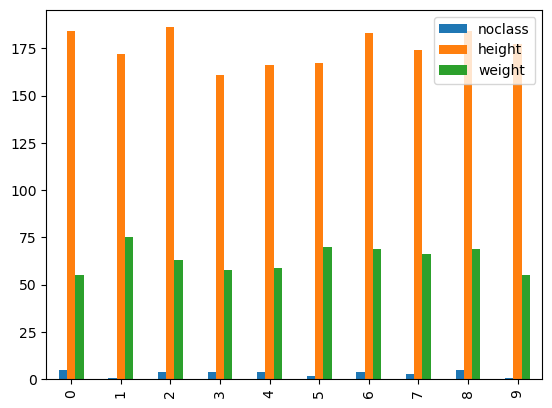

In [91]:
import matplotlib.pyplot as plt

info.plot(kind = 'bar')

<Axes: >

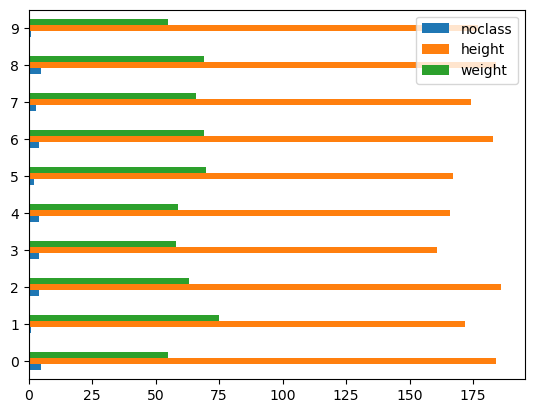

In [92]:
info.plot(kind = 'barh')

<Axes: >

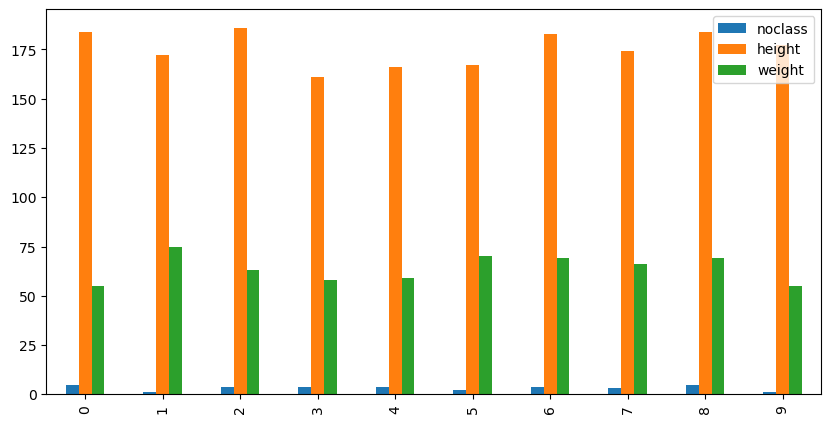

In [93]:
info.plot(kind = 'bar', figsize = (10, 5))